In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.model_selection import cross_val_score
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Part 1: Random forest estimators

df = pd.read_csv(r"C:\Users\weizi\Desktop\IE 517\HW7\ccdefault.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.shape

(30000, 25)

In [6]:
#1.1: Random test train splits
#Run in-sample and out-of-sample accuracy scores for 10 different samples by changing 
#random_state from 1 to 10 in sequence. 

X = df.iloc[:, 1:24].values
y = df['DEFAULT'].values

#Using the ccdefault dataset, with 90% for training and 10% for test (stratified sampling)
#and the decision tree model that you did in Module 2:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)




In [7]:
#1.2 Fit a random forest model, try several different
#values for N_estimators, report in-sample accuracies.


standardscaler = StandardScaler()
standardscaler.fit(X_train)


for i in [1,10,15,20,25,30,35,40,45,50,55,60]:
    time0 = time.process_time()

    forest = RandomForestClassifier(n_estimators=i)

    forest.fit(X_train, y_train)

    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    
    train_set_accuracy=accuracy_score(y_train, y_train_pred)
    
    test_set_accuracy = accuracy_score(y_test, y_test_pred)
    
    cv_accuracy =cross_val_score(forest, X_train, y_train, cv=10)
    
    
    time1=time.process_time()
    print('When N = ', i,':')
    print('In - sample accuracy score = ',train_set_accuracy)
    print('Out - sample accuracy score = ',test_set_accuracy)
    print('In - sample CV accuracy = ',np.mean(cv_accuracy))
    print('running time = ',time1 - time0, "seconds")
    print('                                         ')

When N =  1 :
In - sample accuracy score =  0.8991111111111111
Out - sample accuracy score =  0.7223333333333334
In - sample CV accuracy =  0.7267777777777777
running time =  0.609375 seconds
                                         
When N =  10 :
In - sample accuracy score =  0.9794814814814815
Out - sample accuracy score =  0.8076666666666666
In - sample CV accuracy =  0.8069629629629631
running time =  5.546875 seconds
                                         
When N =  15 :
In - sample accuracy score =  0.9918888888888889
Out - sample accuracy score =  0.8136666666666666
In - sample CV accuracy =  0.8088148148148149
running time =  8.28125 seconds
                                         
When N =  20 :
In - sample accuracy score =  0.9924814814814815
Out - sample accuracy score =  0.813
In - sample CV accuracy =  0.8107777777777778
running time =  10.890625 seconds
                                         
When N =  25 :
In - sample accuracy score =  0.9965925925925926
Out - samp

In [8]:
print(X_train.shape[1])

23


 1) PAY_0                          0.093536
 2) AGE                            0.066689
 3) LIMIT_BAL                      0.060776
 4) BILL_AMT1                      0.059662
 5) BILL_AMT2                      0.053271
 6) BILL_AMT3                      0.051809
 7) PAY_AMT1                       0.051557
 8) BILL_AMT5                      0.050877
 9) BILL_AMT6                      0.050587
10) BILL_AMT4                      0.049843
11) PAY_AMT2                       0.047242
12) PAY_AMT6                       0.046540
13) PAY_AMT3                       0.045321
14) PAY_AMT4                       0.044369
15) PAY_AMT5                       0.042529
16) PAY_2                          0.040406
17) PAY_3                          0.032953
18) PAY_4                          0.024497
19) EDUCATION                      0.020951
20) PAY_6                          0.020045
21) PAY_5                          0.019923
22) MARRIAGE                       0.014204
23) SEX                         

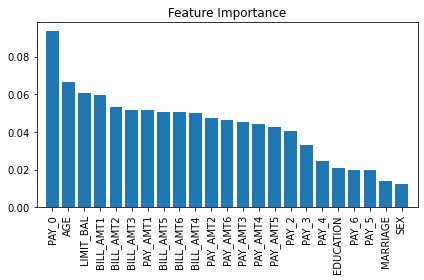

In [10]:
#Part 2: Random forest feature importance


feat_labels = df.columns[1:24]
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [11]:

print("My name is {Zicheng Wei}")
print("My NetID is: {wei41}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Zicheng Wei}
My NetID is: {wei41}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
